# 22. Standard AutoEncoder

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import torch.nn.init
from torch.autograd import Variable

import torchvision
import torchvision.utils as utils
import torchvision.datasets as dsets
import torchvision.transforms as transforms

import numpy as np
import random
import os

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## 22.1 Preparing MNIST Data

In [3]:
mnist_train = dsets.MNIST(root='data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [4]:
batch_size = 100

train_loader  = torch.utils.data.DataLoader(dataset=mnist_train,
                                           batch_size=batch_size,
                                           shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=mnist_test,
                                         batch_size=1,
                                         shuffle=False)

In [5]:
def imshow(img, title):
    npimg = img.numpy()
    fig = plt.figure(figsize = (5, 15))
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.title(title)
    plt.show()

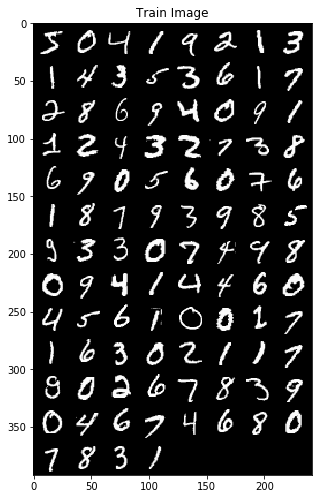

In [6]:
images, labels = iter(train_loader).next()
imshow(torchvision.utils.make_grid(images, normalize=True), "Train Image")

## 22.2 Define Model

In [7]:
class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()
        
        self.encoder = nn.Linear(28*28,28)
        self.decoder = nn.Linear(28,28*28)
        
    def forward(self, x):
        x = x.view(-1,28*28)
        z = self.encoder(x)
        out = self.decoder(z)
        out = out.view(-1,1,28,28)
        
        return out

In [8]:
model = AE().cuda()

## 22.3 Model Training

In [9]:
loss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [10]:
num_epochs = 5

In [11]:
for epoch in range(num_epochs):
    
    total_batch = len(mnist_train) // batch_size
    
    for i, (batch_images, batch_labels) in enumerate(train_loader):
        
        X = Variable(batch_images.view(-1, 28 * 28)).cuda()
        
        pre = model(X)
        cost = loss(pre, X)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print('Epoch [%d/%d], lter [%d/%d] Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, total_batch, cost.data[0]))
    
print("Learning Finished!")

Epoch [1/5], lter [100/600] Loss: 0.0551
Epoch [1/5], lter [200/600] Loss: 0.0529
Epoch [1/5], lter [300/600] Loss: 0.0355
Epoch [1/5], lter [400/600] Loss: 0.0314
Epoch [1/5], lter [500/600] Loss: 0.0298
Epoch [1/5], lter [600/600] Loss: 0.0301
Epoch [2/5], lter [100/600] Loss: 0.0253
Epoch [2/5], lter [200/600] Loss: 0.0291
Epoch [2/5], lter [300/600] Loss: 0.0232
Epoch [2/5], lter [400/600] Loss: 0.0216
Epoch [2/5], lter [500/600] Loss: 0.0222
Epoch [2/5], lter [600/600] Loss: 0.0237
Epoch [3/5], lter [100/600] Loss: 0.0212
Epoch [3/5], lter [200/600] Loss: 0.0249
Epoch [3/5], lter [300/600] Loss: 0.0207
Epoch [3/5], lter [400/600] Loss: 0.0196
Epoch [3/5], lter [500/600] Loss: 0.0207
Epoch [3/5], lter [600/600] Loss: 0.0225
Epoch [4/5], lter [100/600] Loss: 0.0202
Epoch [4/5], lter [200/600] Loss: 0.0241
Epoch [4/5], lter [300/600] Loss: 0.0202
Epoch [4/5], lter [400/600] Loss: 0.0192
Epoch [4/5], lter [500/600] Loss: 0.0203
Epoch [4/5], lter [600/600] Loss: 0.0236
Epoch [5/5], lte

## 22.4 Test Model

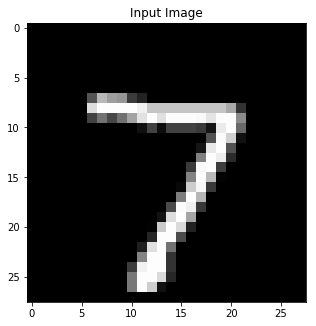

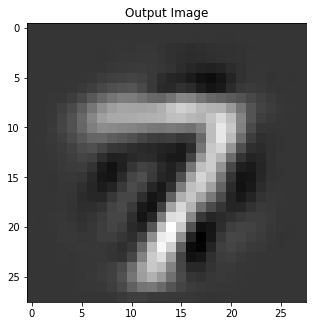

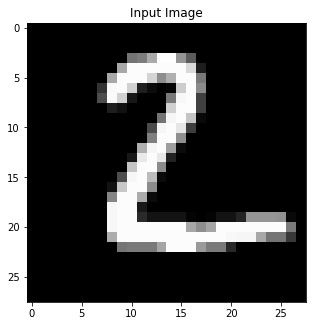

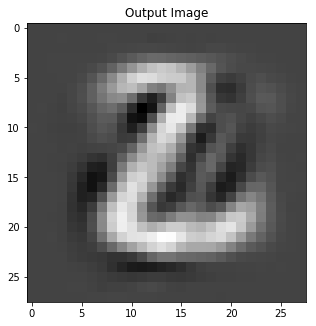

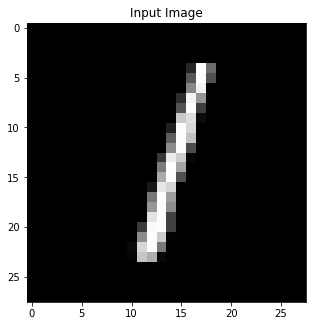

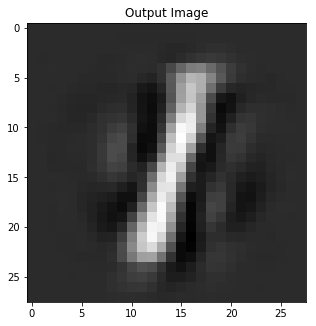

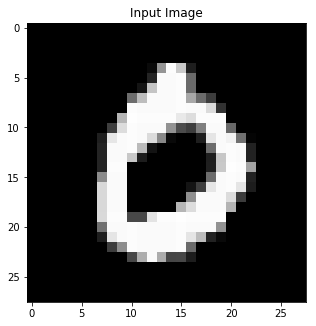

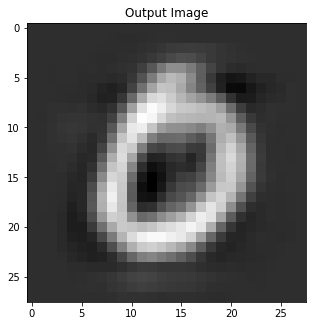

In [12]:
model.eval()

for n, (images, labels) in enumerate(mnist_test):
    
    imshow(torchvision.utils.make_grid(images, normalize=True), "Input Image")
    images  = Variable(images.view(-1, 28 * 28)).cuda()
    
    outputs = model(images)
    outputs = outputs.view(-1, 28, 28)
    
    imshow(torchvision.utils.make_grid(outputs.data.cpu(), normalize=True), "Output Image")
    
    if n > 2 : break